In [2]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [3]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6']
df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Incomplete Datasets\Incomplete Datasets Without Labels\Bupa\Bupa_AG_20.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6
0,NaN,92,45.0,NaN,NaN,0.0
1,85.0,64,59.0,32.0,23.0,0.0
2,86.0,54,33.0,16.0,54.0,0.0
3,91.0,78,34.0,24.0,36.0,0.0
4,98.0,55,13.0,17.0,17.0,0.0
...,...,...,...,...,...,...
340,91.0,54,25.0,22.0,35.0,4.0
341,89.0,48,32.0,22.0,14.0,4.0
342,85.0,52,22.0,23.0,34.0,4.0
343,95.0,93,21.0,27.0,47.0,6.0


In [4]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	46
int64		column 2	0
float64		column 3	88
float64		column 4	90
float64		column 5	90
float64		column 6	88


In [5]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6
count,299.000000,345.000000,257.000000,255.000000,255.000000,257.000000
mean,90.150502,69.869565,30.408560,24.466667,37.078431,3.560311
std,4.520731,18.347670,20.416379,9.998714,37.550828,3.374604
min,65.000000,23.000000,4.000000,5.000000,5.000000,0.000000
25%,87.000000,57.000000,20.000000,19.000000,15.000000,0.500000
50%,90.000000,67.000000,25.000000,23.000000,24.000000,3.000000
75%,93.000000,80.000000,33.000000,27.000000,42.000000,6.000000
max,103.000000,138.000000,155.000000,78.000000,225.000000,20.000000


<AxesSubplot:>

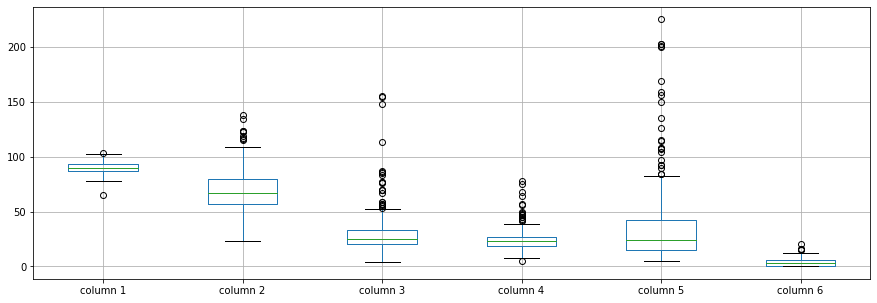

In [6]:
df.boxplot(return_type='axes', figsize=(15,5))

In [7]:
df.mean()

column 1    90.150502
column 2    69.869565
column 3    30.408560
column 4    24.466667
column 5    37.078431
column 6     3.560311
dtype: float64

In [8]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6
column 1,1.000000,0.074678,0.112125,0.191423,0.169349,0.292109
column 2,0.074678,1.000000,0.030367,0.178328,0.139014,0.076169
column 3,0.112125,0.030367,1.000000,0.778489,0.554653,0.172368
column 4,0.191423,0.178328,0.778489,1.000000,0.494266,0.259291
column 5,0.169349,0.139014,0.554653,0.494266,1.000000,0.271470
column 6,0.292109,0.076169,0.172368,0.259291,0.271470,1.000000


In [9]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [10]:
imputer = md.Midas(layer_structure = [6,6+32,6+32+32,6+32+32+32,6+32+32+32+32,6+32+32+32,6+32+32,6+32,6], vae_layer = False, seed = 320)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [6]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 234.72342427571616
Epoch: 1 , loss: 235.81905619303384
Epoch: 2 , loss: 236.8054402669271
Epoch: 3 , loss: 234.93514215378534
Epoch: 4 , loss: 235.97769964308966
Epoch: 5 , loss: 237.96803429013207
Epoch: 6 , loss: 236.60374450683594
Epoch: 7 , loss: 235.92530604771204
Epoch: 8 , loss: 236.4194793701172
Epoch: 9 , loss: 235.8674577985491
Epoch: 10 , loss: 237.52091834658668
Epoch: 11 , loss: 237.91556004115515
Epoch: 12 , loss: 235.88598996117003
Epoch: 13 , loss: 237.13683137439546
Epoch: 14 , loss: 235.2621881394159
Epoch: 15 , loss: 235.6953393845331
Epoch: 16 , loss: 236.16541907900856
Epoch: 17 , loss: 235.71829223632812
Epoch: 18 , loss: 236.50716000511534
Epoch: 19 , loss: 236.3946533203125
Epoch: 20 , loss: 236.61752609979538
Epoch: 21 , loss: 236.7687486921038
Epoch: 22 , loss: 236.43926348005022
Epoch: 23 , loss: 236.66187540690103
Epoch: 24 , loss: 236.61301894414993
Epoch: 25 , loss: 236.143

In [11]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(345, 6)

In [12]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1    90.0
column 2    47.0
column 3    28.0
column 4    15.0
column 5    18.0
column 6     0.5
Name: 21, dtype: float64

In [13]:
complete_df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Original Datasets (1)\Original Datasets Without Labels\Bupa.xlsx', header=None,names=column_names)

In [14]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6
0,-76.55611,0,0.0,-22.598842,-25.966861,0.0
1,0.00000,0,0.0,0.000000,0.000000,0.0
2,0.00000,0,0.0,0.000000,0.000000,0.0
3,0.00000,0,0.0,0.000000,0.000000,0.0
4,0.00000,0,0.0,0.000000,0.000000,0.0
...,...,...,...,...,...,...
340,0.00000,0,0.0,0.000000,0.000000,0.0
341,0.00000,0,0.0,0.000000,0.000000,0.0
342,0.00000,0,0.0,0.000000,0.000000,0.0
343,0.00000,0,0.0,0.000000,0.000000,0.0


Calculating NRMSE Value

In [15]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [16]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [17]:
numerator=Frobenius_norm(new_df-complete_df)
numerator

811.76665138373

In [18]:
denominator=Frobenius_norm(complete_df)
denominator

2519.762091944396

In [19]:
NRMS=numerator/denominator
NRMS


0.32216003803649707

In [19]:
new_df.iloc[66,:]

column 1    86.0
column 2    54.0
column 3    20.0
column 4    21.0
column 5    16.0
column 6     2.0
Name: 66, dtype: float64

In [21]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6
0,85,92,45,27.0,31.0,0.0
1,85,64,59,32.0,23.0,0.0
2,86,54,33,16.0,54.0,0.0
3,91,78,34,24.0,36.0,0.0
4,98,55,13,17.0,17.0,0.0
...,...,...,...,...,...,...
340,91,54,25,22.0,35.0,4.0
341,89,48,32,22.0,14.0,4.0
342,85,52,22,23.0,34.0,4.0
343,95,93,21,27.0,47.0,6.0


In [20]:
imputations[-1].to_excel("Bupa_AG_20(imp).xlsx", index=False, header=False)